**Q-4.** 

**Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm
Dataset This is the Dataset You can use this dataset for this question.**

**Ans.**

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [93]:
# Load the dataset
data = pd.read_csv("online_shoppers_intention.csv")

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<AxesSubplot:ylabel='VisitorType'>

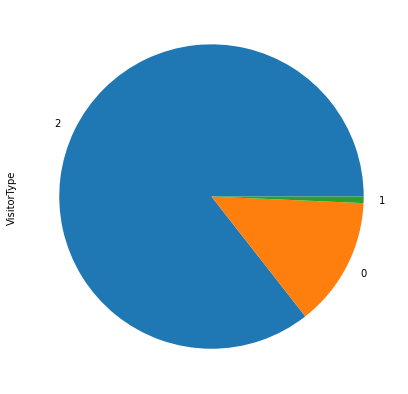

In [113]:
data['VisitorType'].value_counts().plot.pie(y='VisitorType', figsize=(7, 7))

<AxesSubplot:xlabel='Weekend'>

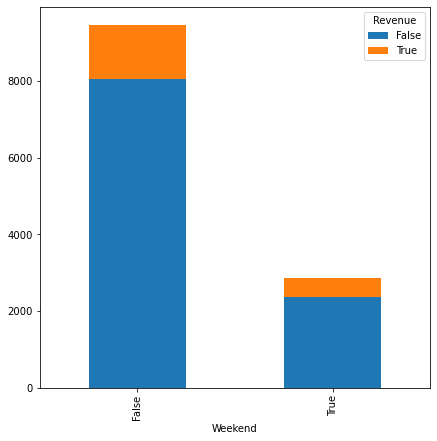

In [114]:
data.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(7, 7))

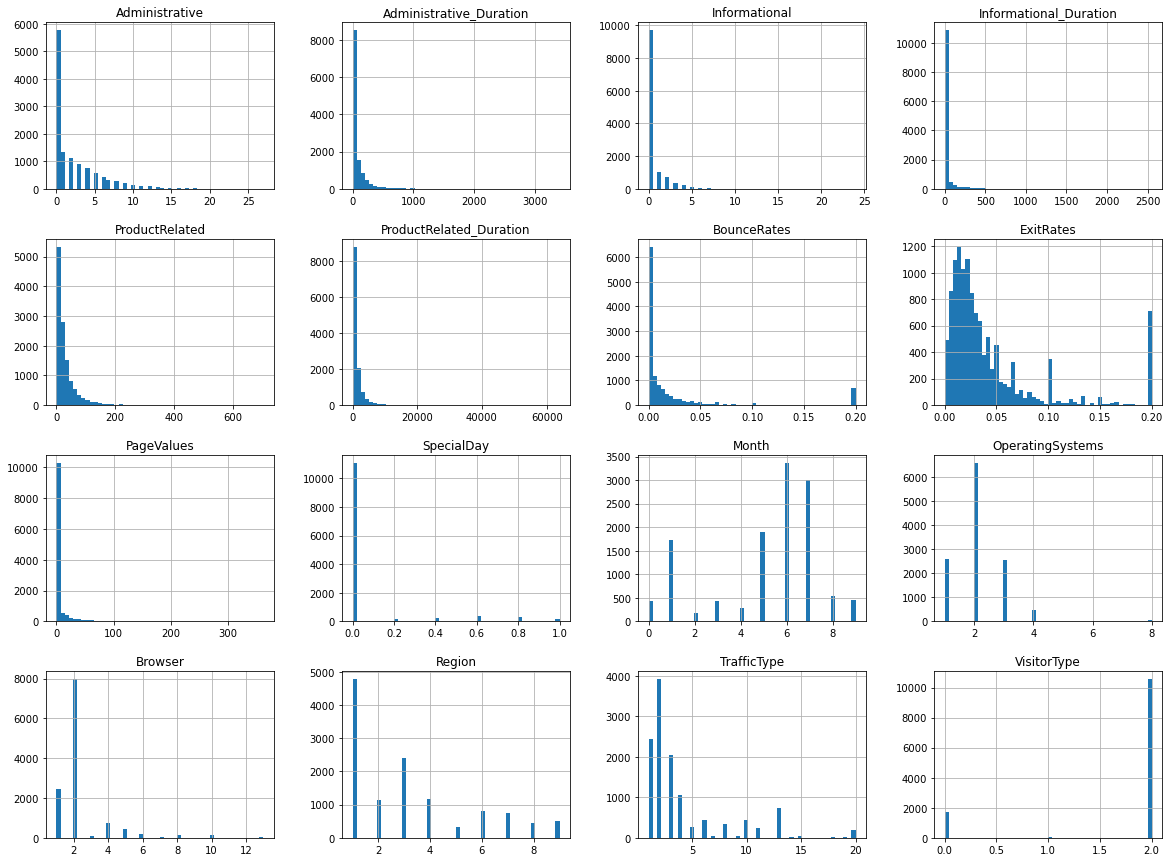

In [115]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [94]:
# Encode categorical variables
cat_columns = ["Month", "VisitorType"]  # Update with your categorical columns
label_encoder = LabelEncoder()
for column in cat_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [95]:
# Separate features and target variable
X = data.drop(["Revenue", "Weekend", "Informational_Duration"], axis=1)
y_revenue = data["Revenue"]
y_weekend = data["Weekend"]
y_duration = data["Informational_Duration"]


In [96]:
# Split the data into train and test sets
X_train, X_test, y_revenue_train, y_revenue_test, y_weekend_train, y_weekend_test, y_duration_train, y_duration_test = train_test_split(
    X, y_revenue, y_weekend, y_duration, test_size=0.2, random_state=42
)

In [99]:
# Create the ensemble classifier
classifier = RandomForestClassifier(n_estimators=100)

In [100]:
# Train the classifier for revenue prediction
classifier.fit(X_train, y_revenue_train)


RandomForestClassifier()

In [101]:
# Make predictions on the test set for revenue
revenue_predictions = classifier.predict(X_test)

In [104]:
# Evaluate revenue predictions
revenue_accuracy = accuracy_score(y_revenue_test, revenue_predictions)
revenue_classification_report = classification_report(y_revenue_test, revenue_predictions)

In [105]:
# Train the classifier for weekend prediction
classifier.fit(X_train, y_weekend_train)

# Make predictions on the test set for weekend
weekend_predictions = classifier.predict(X_test)

# Evaluate weekend predictions
weekend_accuracy = accuracy_score(y_weekend_test, weekend_predictions)
weekend_classification_report = classification_report(y_weekend_test, weekend_predictions)

In [110]:
# Train the regressor for informational duration prediction
regressor = RandomForestRegressor(n_estimators=100)

# Train the regressor for informational duration prediction
regressor.fit(X_train, y_duration_train)

# Make predictions on the test set for informational duration
duration_predictions = regressor.predict(X_test)

# Evaluate duration predictions (e.g., using mean squared error)
duration_mse = mean_squared_error(y_duration_test, duration_predictions)

In [112]:
# Print results
print("Revenue Accuracy:", revenue_accuracy)
print("Revenue Classification Report:\n", revenue_classification_report)
print("Weekend Accuracy:", weekend_accuracy)
print("Weekend Classification Report:\n", weekend_classification_report)
print("Informational Duration MSE:", duration_mse)

Revenue Accuracy: 0.8917274939172749
Revenue Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.97      0.94      2055
        True       0.76      0.52      0.61       411

    accuracy                           0.89      2466
   macro avg       0.83      0.74      0.78      2466
weighted avg       0.88      0.89      0.88      2466

Weekend Accuracy: 0.764801297648013
Weekend Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.99      0.86      1846
        True       0.71      0.11      0.19       620

    accuracy                           0.76      2466
   macro avg       0.74      0.55      0.53      2466
weighted avg       0.75      0.76      0.69      2466

Informational Duration MSE: 13863.852953104368
